In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd
import numpy as np

import scipy.optimize as sco

import warnings
warnings.filterwarnings('ignore')

import sklearn.cluster as cl
from sklearn import mixture

data_folder = '../data/'
path = data_folder + 'GEV_SM/swissmetro.dat'

from classes.MNLogit import *
from helpers.data import *
from helpers.algos import *
from helpers.models import *
import copy

import matplotlib.pyplot as plt

import time
import pickle

import hyperopt
from hyperopt.pyll.base import scope
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

import seaborn as sns

from matplotlib import rc

import numdifftools as nd

sns.set(font_scale=1.5)

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

seed = 1234

In [3]:
models = {'norm': load_model(path, 'norm'), 'raw': load_model(path, 'raw')}
x = np.zeros(len(models['norm'].params))

In [4]:
%%time
res_bfgs = sco.minimize(models['norm'].negloglikelihood, x, method='BFGS', tol=1e-10, jac=models['norm'].neg_grad)

CPU times: user 2.76 s, sys: 36 ms, total: 2.79 s
Wall time: 2.79 s


In [5]:
res_bfgs.fun

0.7908058095403111

# First order

In [6]:
nbr = 2
draws = 1000

labels = {
    'GD': 'Gradient Descent',
    'SGD-100': 'Stochastic GD (batch size: 100)',
    'adagrad-100': 'Adagrad (batch size: 1000)'
}

res = {'norm': {}, 'raw': {}}

In [7]:
for key in res.keys():
    print("Train models {}".format(key))

    dct = {}  

    start = time.time()
    epochs, xs, lls = line_search_mbSGD(models[key], x, 2, len(models[key].df), False)
    stop = time.time()

    dct['epochs'] = epochs
    dct['lls'] = lls
    dct['times'] = stop-start

    res[key]['GD'] = dct
    
    print()

Train models norm
Start Line search mini batch SGD for 2 epochs (2 iterations)

Train models unorm
Start Line search mini batch SGD for 2 epochs (2 iterations)



In [8]:
for key in res.keys():
    print("Train models {}".format(key))

    np.random.seed(seed)

    dct = {}

    lls = []
    times = []
    xs = []
    for d in range(draws):

        start = time.time()
        ep, x_val, ll = line_search_mbSGD(models[key], x, nbr, 100, False)
        stop = time.time()

        times.append(stop-start)
        lls.append(ll)
        xs.append(x_val)

    dct['epochs'] = np.array(ep)
    dct['lls'] = np.array(lls)
    dct['times'] = np.array(times)
    dct['xs'] = np.array(xs)
    
    res[key]['SGD-100'] = dct    
    
    print()

Train models norm
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iterations)
Start Line search mini batch SGD for 2 epochs (181 iter

In [9]:
for key in res.keys():
    print("Train models {}".format(key))

    np.random.seed(seed)

    dct = {}

    lls = []
    times = []
    xs = []
    for d in range(draws):

        start = time.time()
        ep, x_val, ll = line_search_adagrad(models[key], x, nbr, 100, False)
        stop = time.time()

        times.append(stop-start)
        lls.append(ll)
        xs.append(x_val)

    dct['epochs'] = np.array(ep)
    dct['lls'] = np.array(lls)
    dct['times'] = np.array(times)
    dct['xs'] = xs

    res[key]['adagrad-100'] = dct 
    
    print()

Train models norm
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 

Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iter

Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iter

Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iter

Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iter

Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iter

Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iter

Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iter

Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iter

Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iter

Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iter

Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iter

Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iter

Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iterations)
Start Line search Adagrad for 2 epochs (181 iter

In [10]:
for key in res.keys():
    print("Train models {}".format(key))

    np.random.seed(seed)

    dct = {}

    lls = []
    times = []
    xs = []
    for d in range(draws):

        start = time.time()
        ep, x_val, ll, perc = line_search_mini_batch_SNM(models[key], x, nbr, 1000, False)
        stop = time.time()

        times.append(stop-start)
        lls.append(ll)
        xs.append(x_val)

    dct['epochs'] = np.array(ep)
    dct['lls'] = np.array(lls)
    dct['times'] = np.array(times)
    dct['xs'] = xs

    res[key]['SNM-1000'] = dct 
    
    print()

Train models norm
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start 

Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini b

Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini b

Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini b

Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini b

Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini b

Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini b

Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini b

Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini b

Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini b

Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini b

Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini b

Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini b

Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini b

Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini batch SN for 2 epochs (19 iterations)
Start Line search mini b

In [11]:
with open('../data/norm_vs_raw.p', 'wb') as outfile:
    pickle.dump(res, outfile)

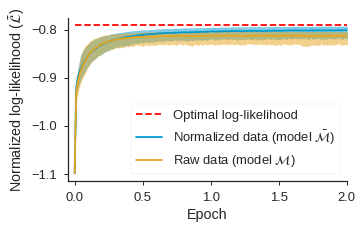

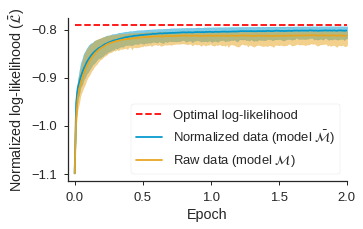

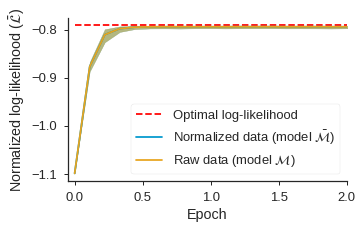

In [12]:
with open('../data/norm_vs_raw.p', 'rb') as infile:
    res = pickle.load(infile)

colors = {'unorm': (232/255,164/255,29/255), 
          'norm': (0/255,152/255,205/255)}

labels = {'unorm': 'Raw data (model $\\mathcal{M}$)', 'norm': 'Normalized data (model $\\bar{\\mathcal{M}}$)'}

file = {'SGD-100': 'SGD_norm_raw', 'adagrad-100': 'adagrad_norm_raw', 'SNM-1000': 'SNM_norm_raw'}

for algo in ['SGD-100', 'adagrad-100', 'SNM-1000']:    

    plt.figure(figsize=(5,3), frameon=False)

    sns.set_context("paper")
    sns.set(font_scale = 1.3)
    sns.set_style("white", {
        "font.family": "sans-serif",
        "font.serif": ['Helvetica'],
        "font.scale": 2
    })
    sns.set_style("ticks", {"xtick.major.size": 4,
                            "ytick.major.size": 4})

    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.plot([0, nbr], [-res_bfgs.fun, -res_bfgs.fun], 'r--', label='Optimal log-likelihood')

    for key in res.keys():

        epochs = res[key][algo]['epochs']

        plus = []
        minus = []
        avg = []

        vals = res[key][algo]['lls']

        #print(res[key][algo]['xs'][-1][-1])

        for i in range(vals.shape[1]):
            avg.append(np.mean(vals[:,i]))
            minus.append(np.percentile(vals[:,i], 5))
            plus.append(np.percentile(vals[:,i], 95))

        ax.plot(epochs, avg, linestyle='-', color=colors[key], label=labels[key])#, label=labels[key])
        ax.fill_between(epochs, plus, minus, color=colors[key], alpha=0.5)

    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Normalized log-likelihood ($\\bar{\\mathcal{L}}$)')
    leg = ax.legend(frameon=True)
    ax.set_xlim([-0.05, nbr])
    
    plt.savefig('../figures/{}.pdf'.format(file[algo]), bbox_inches='tight')

In [13]:
for algo in ['SGD-100', 'adagrad-100', 'SNM-1000']:
    
    avg = {}
    
    for key in res:
        lls = res[key][algo]['lls']
        
        tmp = lls[:,-1]
        
        avg[key] = np.mean(tmp)
        
    print(algo)
    print("  LL for raw data: {:.6f}".format(avg['unorm']))
    print("  LL for norm data: {:.6f}".format(avg['norm']))
    print("  Diff: {:.2f}".format(np.abs(100*(avg['norm']-avg['unorm'])/avg['norm'])))
    print()

SGD-100
  LL for raw data: -0.813107
  LL for norm data: -0.801739
  Diff: 1.42

adagrad-100
  LL for raw data: -0.812080
  LL for norm data: -0.801646
  Diff: 1.30

SNM-1000
  LL for raw data: -0.794219
  LL for norm data: -0.794219
  Diff: 0.00

